In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Time_Marks.csv')
df

,student_id,duration_sec,actual_mark,percentage_mark
0,623aa09afb492fa5df262d0e,107,15.00,100.00
1,623a7385fb492fa5df1dc1c8,223,15.00,100.00
2,623a4e17fb492fa5df14fa5b,185,15.00,100.00
3,623a97dcfb492fa5df24a781,142,15.00,100.00
4,623a7385fb492fa5df1dc1c8,149,15.00,100.00
...,...,...,...,...
1818,623aa0ecfb492fa5df263b2b,64,-1.25,-5.00
1819,623a52bafb492fa5df163464,173,-2.00,-6.67
1820,623a5273fb492fa5df16218e,364,-1.25,-8.33
1821,623a4fb2fb492fa5df156846,429,-1.25,-8.33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       1823 non-null   object 
 1   duration_sec     1823 non-null   int64  
 2   actual_mark      1823 non-null   float64
 3   percentage_mark  1823 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 57.1+ KB


In [4]:
df.isnull().sum()

student_id         0
duration_sec       0
actual_mark        0
percentage_mark    0
dtype: int64

In [5]:
df['student_id'].value_counts()

student_id
623ad09bfb492fa5df2dc9d4    46
623a4e7cfb492fa5df1515a9    34
623aa09afb492fa5df262d0e    23
623a42b2fb492fa5df11c4b7    21
623acd24fb492fa5df2d4517    21
                            ..
623abca6fb492fa5df2abfee     1
623a3fc4fb492fa5df10e509     1
623ad5effb492fa5df2e929c     1
623ab2e5fb492fa5df2933cc     1
623abbdbfb492fa5df2aa029     1
Name: count, Length: 300, dtype: int64

In [6]:
df['percentage_mark'].value_counts()

percentage_mark
 0.00     188
 75.00    140
 50.00     66
 83.33     65
 62.50     57
         ... 
 89.17      1
 88.75      1
 38.00      1
 41.00      1
-10.00      1
Name: count, Length: 182, dtype: int64

In [7]:
df.tail()

,student_id,duration_sec,actual_mark,percentage_mark
1818,623aa0ecfb492fa5df263b2b,64,-1.25,-5.00
1819,623a52bafb492fa5df163464,173,-2.00,-6.67
1820,623a5273fb492fa5df16218e,364,-1.25,-8.33
1821,623a4fb2fb492fa5df156846,429,-1.25,-8.33
1822,623ac061fb492fa5df2b5443,358,-2.50,-10.00


In [8]:
df_avg = df.groupby('student_id').agg({
    'duration_sec': 'mean',
    'actual_mark': 'mean',
    'percentage_mark': 'mean'
}).reset_index()
df_avg

,student_id,duration_sec,actual_mark,percentage_mark
0,623a318cfb492fa5df0c2456,1443.692308,15.192308,62.883846
1,623a318efb492fa5df0c24df,918.250000,23.041667,92.708333
2,623a3243fb492fa5df0c6751,519.333333,13.083333,54.000000
3,623a3313fb492fa5df0cb1a2,627.000000,4.000000,15.437500
4,623a338ffb492fa5df0cde2b,1050.181818,7.181818,29.180909
...,...,...,...,...
295,623ad512fb492fa5df2e727e,822.000000,15.500000,58.886667
296,623ad513fb492fa5df2e72c7,1510.000000,3.375000,11.250000
297,623ad5a9fb492fa5df2e88aa,381.750000,7.562500,33.385000
298,623ad5effb492fa5df2e929c,191.000000,8.500000,42.500000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_avg[['duration_sec', 'actual_mark', 'percentage_mark']])

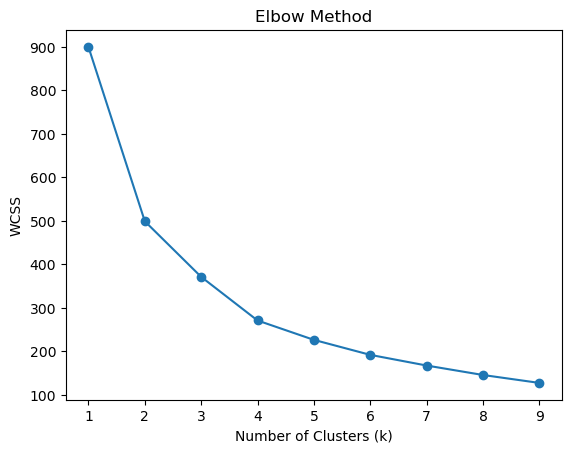

In [10]:
from sklearn.cluster import KMeans
# Step 4: Elbow Method to choose k
wcss = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

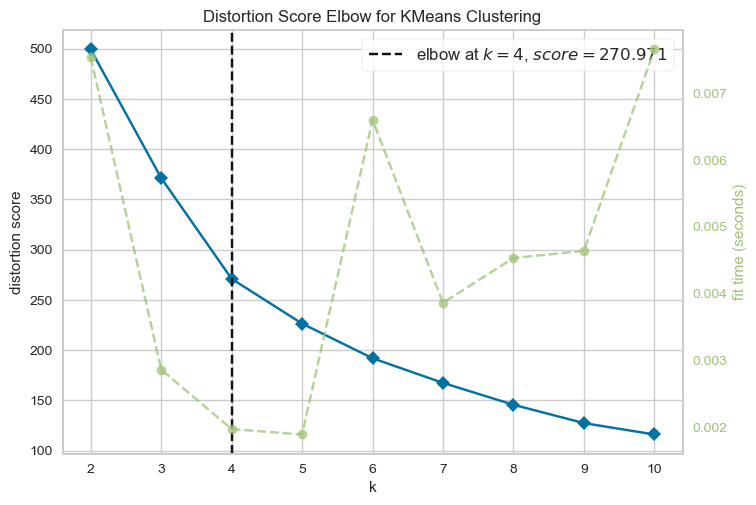

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
Elbow = KElbowVisualizer(model, k=10)
Elbow.fit(X_scaled)
Elbow.show()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_avg['cluster'] = kmeans.fit_predict(X_scaled)

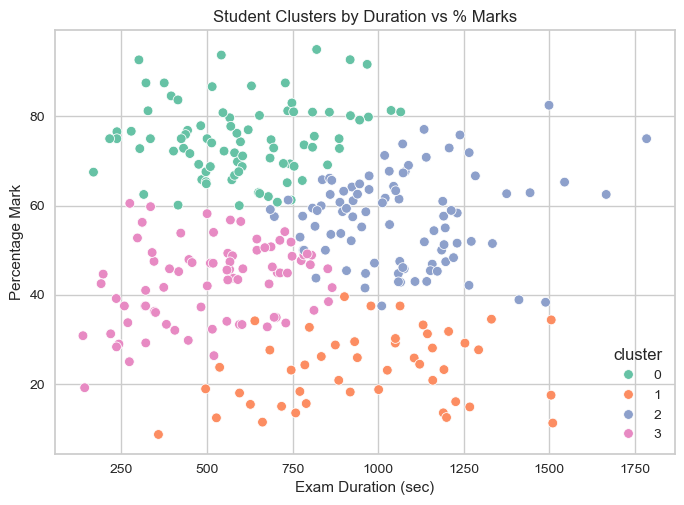

In [13]:
sns.scatterplot(data=df_avg, x='duration_sec', y='percentage_mark', hue='cluster', palette='Set2')
plt.title("Student Clusters by Duration vs % Marks")
plt.xlabel("Exam Duration (sec)")
plt.ylabel("Percentage Mark")
plt.show()

In [14]:
df

,student_id,duration_sec,actual_mark,percentage_mark
0,623aa09afb492fa5df262d0e,107,15.00,100.00
1,623a7385fb492fa5df1dc1c8,223,15.00,100.00
2,623a4e17fb492fa5df14fa5b,185,15.00,100.00
3,623a97dcfb492fa5df24a781,142,15.00,100.00
4,623a7385fb492fa5df1dc1c8,149,15.00,100.00
...,...,...,...,...
1818,623aa0ecfb492fa5df263b2b,64,-1.25,-5.00
1819,623a52bafb492fa5df163464,173,-2.00,-6.67
1820,623a5273fb492fa5df16218e,364,-1.25,-8.33
1821,623a4fb2fb492fa5df156846,429,-1.25,-8.33


In [15]:
df_avg

,student_id,duration_sec,actual_mark,percentage_mark,cluster
0,623a318cfb492fa5df0c2456,1443.692308,15.192308,62.883846,2
1,623a318efb492fa5df0c24df,918.250000,23.041667,92.708333,0
2,623a3243fb492fa5df0c6751,519.333333,13.083333,54.000000,3
3,623a3313fb492fa5df0cb1a2,627.000000,4.000000,15.437500,1
4,623a338ffb492fa5df0cde2b,1050.181818,7.181818,29.180909,1
...,...,...,...,...,...
295,623ad512fb492fa5df2e727e,822.000000,15.500000,58.886667,2
296,623ad513fb492fa5df2e72c7,1510.000000,3.375000,11.250000,1
297,623ad5a9fb492fa5df2e88aa,381.750000,7.562500,33.385000,3
298,623ad5effb492fa5df2e929c,191.000000,8.500000,42.500000,3


In [16]:
df_avg.groupby('cluster')[['duration_sec', 'actual_mark', 'percentage_mark']].mean()

,duration_sec,actual_mark,percentage_mark
cluster,,,
0,601.741327,18.173300,74.876000
1,967.134738,5.589506,23.582216
2,1062.657189,14.385238,57.111992
3,515.479301,10.374249,43.008542


In [18]:
df_avg.groupby('cluster').agg({
    'student_id': 'count',
    'duration_sec': 'mean',
    'actual_mark': 'mean',
    'percentage_mark': 'mean'
}).rename(columns={'student_id': 'student_count'})

,student_count,duration_sec,actual_mark,percentage_mark
cluster,,,,
0,82,601.741327,18.173300,74.876000
1,47,967.134738,5.589506,23.582216
2,90,1062.657189,14.385238,57.111992
3,81,515.479301,10.374249,43.008542


## Explanation of Each Cluster and Next steps


| Cluster | Student Count | Avg Duration (sec) | Avg Mark | % Mark   |
| ------- | ------------- | ------------------ | -------- | -------- |
| 0       | 82            | 601 (\~10 min)     | 18.17    | 74.88%   |
| 1       | 47            | 967 (\~16 min)     | 5.59     | 23.58%   |
| 2       | 90            | 1062 (\~18 min)    | 14.38    | 57.11%   |
| 3       | 81            | 515 (\~8.6 min)    | 10.37    | 43.01%   |

---

##  1.  Cluster Naming Suggestion:

| Cluster | Suggested Name                | Reasoning                              |
| ------- | ----------------------------- | -------------------------------------- |
| **0**   |  High Performers (Efficient)  | High % mark + average time             |
| **1**   |  Struggling Students          | Very low % and long time → need help   |
| **2**   |  Slow but Steady              | Medium score, but high time taken      |
| **3**   |  Fast but Unstable            | Low-medium score, but very fast time → |

---

##  2. Notification/Feedback Messages per Cluster:

You can use these as **email, app message, or SMS** notifications.

---

###  Cluster 0:  High Performers (Efficient)

**Message:**

>  Great job! You're performing excellently with great accuracy and efficiency. Keep up the good work and consider practicing advanced problems to challenge yourself further.

**Action Suggestion:**

* Give access to **advanced-level practice sets**
* Offer to become **peer mentors** for others

---

###  Cluster 1:  Struggling Students

**Message:**

>  We’ve noticed you're facing difficulties in the exams. Don’t worry — help is available! Review previous topics and try our specially designed practice sets for improvement.

**Action Suggestion:**

* Assign **remedial modules**
* Recommend **one-on-one mentoring**
* Trigger **alert for academic team** to follow up

---

###  Cluster 2:  Slow but Steady

**Message:**

>  You're showing good effort and accuracy! With a little more time management, your performance can go even higher. Practice timed quizzes to improve speed.

**Action Suggestion:**

* Recommend **time-bound mock tests**
* Provide **tips on time management during exams**

---

###  Cluster 3:  Fast but Unstable

**Message:**

>  You're completing exams quickly, but accuracy needs improvement. Focus on reading questions carefully and avoid rushing. Try our accuracy-focused practice sets.

**Action Suggestion:**

* Provide **accuracy-focused exercises**
* Show **error analysis reports** of their mistakes

---

##  3. Company Decision-Making Based on Clusters

| Cluster | What company should do                                    |
| ------- | --------------------------------------------------------- |
| 0       | Engage them in advanced modules, mentorship, leaderboards |
| 1       | Send early interventions, counselor support, email alerts |
| 2       | Provide personalized time-management workshops            |
| 3       | Offer error-detection training, slow-down strategy        |


In [19]:
# Cluster name dictionary
cluster_names = {
    0: 'High Performers (Efficient)',
    1: 'Struggling Students',
    2: 'Slow but Steady',
    3: 'Fast but Unstable'
}

# Notification messages dictionary
cluster_messages = {
    0: ' Excellent work! Keep it up and explore advanced materials.',
    1: ' You might need some help. Try review sessions and practice sets.',
    2: ' Good job! Now work on improving speed with time-bound tests.',
    3: ' Try to slow down a bit and focus more on accuracy.'
}

# Apply new columns
df_avg['cluster_name'] = df_avg['cluster'].map(cluster_names)
df_avg['feedback_message'] = df_avg['cluster'].map(cluster_messages)


In [20]:
# Save to CSV
df_avg.to_csv("final_clustered_students.csv", index=False)